# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.25 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [ ]:
%pip install -U ultralytics sahi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=65de70ae217e65cdc22a04955d46b0fe4c618c7efe9c5c6950cde48f139399f1
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [ ]:
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 27242, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 27242 (delta 136), reused 128 (delta 56), pack-reused 26982
Receiving objects: 100% (27242/27242), 16.00 MiB | 11.88 MiB/s, done.
Resolving deltas: 100% (19125/19125), done.
/content/ultralytics


In [ ]:
# Google Colab에서 loss.py 파일 수정
!nano ultralytics/yolo/v8/detect/loss.py

/bin/bash: line 1: nano: command not found


# 1. Predict

YOLOv8 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLOv8 Predict Docs](https://docs.ultralytics.com/modes/train/).


In [ ]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 6.23M/6.23M [00:00<00:00, 72.1MB/s]
Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 165k/165k [00:00<00:00, 5.26MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 139.8ms
Speed: 14.9ms preprocess, 139.8ms inference, 1891.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/212889447-69e5bdf1-5800-4e29-835e-2ed2336dede2.jpg" width="600">

# 2. Val
Validate a model's accuracy on the [COCO](https://docs.ultralytics.com/datasets/detect/coco/) dataset's `val` or `test` splits. The latest YOLOv8 [models](https://github.com/ultralytics/ultralytics#models) are downloaded automatically the first time they are used. See [YOLOv8 Val Docs](https://docs.ultralytics.com/modes/val/) for more information.

In [ ]:
!yolo val model=yolov8s.pt data=VisDrone.yaml

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/datasets/VisDrone/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100% 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 35/35 [01:03<00:00,  1.80s/it]
                   all        548      38759     0.0675     0.0651     0.0389     0.0182
                person        548       8844      0.287      0.259        0.2     0.0897
               bicycle        548       5125      0.116      0.008     0.0523     0.0173
                   car        548       1287     0.0016     0.0186    0.00144   0.000498
            motorcycle        548      14064     0.0152     0.0022     0.0317     0.0192
              airplane        548       1975          0          0    0.00232    0.00174
                   bus  

In [ ]:
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'TensorBoard' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

In [ ]:
# Train YOLOv8n on VisDrone for 10 epochs
!yolo train model=yolov8s.pt data=VisDrone.yaml epochs=10 imgsz=640

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=VisDrone.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

In [ ]:
!yolo val model=/content/yolov8s_best_mshamrai.pt data=VisDrone.yaml

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/VisDrone/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100% 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 35/35 [01:23<00:00,  2.40s/it]
                   all        548      38759      0.521      0.389      0.401      0.239
            pedestrian        548       8844      0.532      0.404      0.434      0.199
                people        548       5125      0.581      0.284      0.339      0.129
               bicycle        548       1287      0.259      0.163      0.139     0.0629
                   car        548      14064      0.742       0.77      0.797      0.566
                   van        548       1975      0.524      0.453      0.455      0.318
                 truck    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/best (7).pt')  # load a pretrained model
results = model('/content/drive/MyDrive/240523/test images', save = True, save_txt = True, save_conf = True )  # predict on an image


image 1/3 /content/drive/MyDrive/240523/test images/00003612.jpg: 384x640 1 pedestrian, 31 cars, 6 vans, 1 motor, 667.3ms
image 2/3 /content/drive/MyDrive/240523/test images/00007489.jpg: 384x640 42 cars, 3 vans, 3 trucks, 4 motors, 325.1ms
image 3/3 /content/drive/MyDrive/240523/test images/00008070.jpg: 384x640 1 pedestrian, 26 cars, 2 vans, 1 bus, 323.4ms
Speed: 8.1ms preprocess, 438.6ms inference, 602.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
3 labels saved to runs/detect/predict/labels


In [ ]:
from ultralytics import YOLO
model = YOLO('/content/best (7).pt')  # load a pretrained model
model.predict("/content/drive/MyDrive/240523/test images", save = True, save_txt = True, save_conf = True, conf=0.25, iou=0.45)  # predict on an image


image 1/3 /content/drive/MyDrive/240523/test images/00003612.jpg: 384x640 1 pedestrian, 31 cars, 6 vans, 1 motor, 553.5ms
image 2/3 /content/drive/MyDrive/240523/test images/00007489.jpg: 384x640 39 cars, 3 vans, 2 trucks, 4 motors, 335.6ms
image 3/3 /content/drive/MyDrive/240523/test images/00008070.jpg: 384x640 1 pedestrian, 26 cars, 2 vans, 1 bus, 334.1ms
Speed: 3.1ms preprocess, 407.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
3 labels saved to runs/detect/predict2/labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pedestrian', 1: 'people', 2: 'bicycle', 3: 'car', 4: 'van', 5: 'truck', 6: 'tricycle', 7: 'awning-tricycle', 8: 'bus', 9: 'motor'}
 obb: None
 orig_img: array([[[201, 200, 196],
         [198, 197, 193],
         [193, 192, 188],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        [[202, 201, 197],
         [199, 198, 194],
         [194, 193, 189],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        [[204, 203, 199],
         [202, 201, 197],
         [197, 196, 192],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        ...,
 
        [[129, 132, 136],
         [129, 132, 136],
         [129, 132, 136],
         ...,
         [136, 151, 177],
         [132, 147, 173],
         [129, 14

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/yolov8s_best_mshamrai.pt')  # load a pretrained model
model.predict('/content/drive/MyDrive/240523/test images', save=True, save_txt=True, save_conf=True, conf=0.25, iou=0.45)  # predict on an image


image 1/3 /content/drive/MyDrive/240523/test images/00003612.jpg: 384x640 3 pedestrians, 30 cars, 11 vans, 1 awning-tricycle, 2 motors, 315.3ms
image 2/3 /content/drive/MyDrive/240523/test images/00007489.jpg: 384x640 2 pedestrians, 35 cars, 3 vans, 4 trucks, 2 awning-tricycles, 10 motors, 540.7ms
image 3/3 /content/drive/MyDrive/240523/test images/00008070.jpg: 384x640 4 pedestrians, 30 cars, 3 vans, 1 truck, 1 bus, 876.2ms
Speed: 4.9ms preprocess, 577.4ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
3 labels saved to runs/detect/predict3/labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pedestrian', 1: 'people', 2: 'bicycle', 3: 'car', 4: 'van', 5: 'truck', 6: 'tricycle', 7: 'awning-tricycle', 8: 'bus', 9: 'motor'}
 obb: None
 orig_img: array([[[201, 200, 196],
         [198, 197, 193],
         [193, 192, 188],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        [[202, 201, 197],
         [199, 198, 194],
         [194, 193, 189],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        [[204, 203, 199],
         [202, 201, 197],
         [197, 196, 192],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        ...,
 
        [[129, 132, 136],
         [129, 132, 136],
         [129, 132, 136],
         ...,
         [136, 151, 177],
         [132, 147, 173],
         [129, 14

In [ ]:
!yolo train model=yolov8s.pt data=VisDrone.yaml epochs=20 imgsz=640 hsv_h = 0.2  mixup = 0.2 copy_paste = 0.5

Ultralytics YOLOv8.2.25 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=VisDrone.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

In [ ]:
## validation에서 원래 conf=0.001, iou=0.6, max_det = 300임
## conf 값을 높인 결과 정밀도가
## iou 값을 0.45로 낮춘 것은 NMS 과정에서 0.45만큼 겹친 박스를 사용했다는 것으로, 덜 엄격하게 유효한 탐지로 간주함

In [ ]:
!yolo val model="/content/ultralytics/runs/detect/train4/weights/best.pt" data=VisDrone.yaml conf=0.25 iou=0.45 max_det = 100

Ultralytics YOLOv8.2.25 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/VisDrone/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100% 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 35/35 [00:36<00:00,  1.05s/it]
                   all        548      38759        0.6      0.304      0.455      0.301
            pedestrian        548       8844       0.67      0.312      0.506      0.266
                people        548       5125      0.696      0.191       0.44      0.194
               bicycle        548       1287       0.33      0.117      0.213      0.105
                   car        548      14064      0.807      0.715      0.796        0.6
                   van        548       1975      0.593      0.364      0.487      0.383
                 truck    

In [ ]:
!yolo val model="/content/yolov8s_best_mshamrai.pt" data=VisDrone.yaml conf=0.25 iou=0.45 max_det = 100

Ultralytics YOLOv8.2.25 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/VisDrone/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100% 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86% 30/35 [04:32<00:35,  7.17s/it]

In [ ]:
!yolo train model="/content/ultralytics/runs/detect/train/weights/best.pt" data=VisDrone.yaml epochs=10 imgsz=640 hsv_h = 0.2  mixup = 0.5 copy_paste = 0.5

Ultralytics YOLOv8.2.25 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/ultralytics/runs/detect/train/weights/best.pt, data=VisDrone.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

In [ ]:
## 20번 학습한 모델 추가 학습

In [ ]:
!yolo train model="/content/best (7).pt" data=VisDrone.yaml epochs=5 imgsz=640 hsv_h = 0.2  mixup = 0.2 copy_paste = 0.5

Ultralytics YOLOv8.2.25 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/best (7).pt, data=VisDrone.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

In [ ]:
## SAHI 사용

In [ ]:
from pathlib import Path

from IPython.display import Image
from sahi import AutoDetectionModel
from sahi.predict import get_prediction, get_sliced_prediction, predict
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.utils.yolov8 import download_yolov8s_model


In [ ]:
# Download YOLOv8 model
yolov8_model_path = "models/yolov8s.pt"
download_yolov8s_model(yolov8_model_path)

# Download test images
download_from_url(
    "https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg",
    "demo_data/small-vehicles1.jpeg",
)
download_from_url(
    "https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png",
    "demo_data/terrain2.png",
)

In [ ]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov8",
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device="cpu",  # or 'cuda:0'
)

In [ ]:
# With an image path
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

# With a numpy image
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

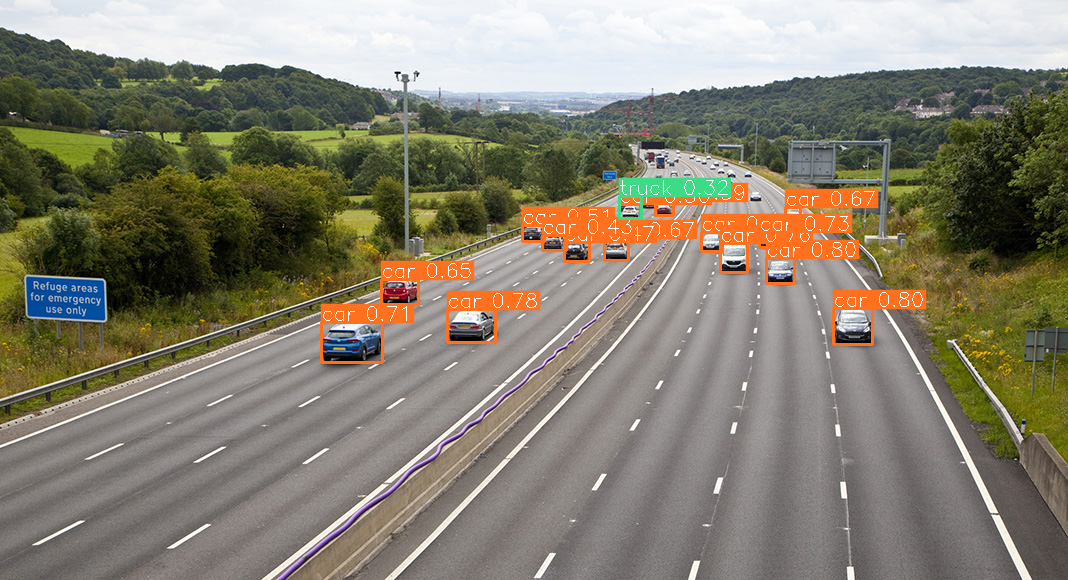

In [ ]:
result.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")

In [ ]:
### 여기부터 SAHI 사용

In [ ]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing prediction on 15 slices.


In [ ]:
predict(
    model_type="yolov8",
    model_path="/content/models/yolov8s.pt",
    model_device="cpu",  # or 'cuda:0'
    model_confidence_threshold=0.4,
    source="/content/demo_data/small-vehicles1.jpeg",
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing inference on images:   0%|          | 0/1 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images: 100%|██████████| 1/1 [00:09<00:00,  9.61s/it]

Prediction time is: 9551.01 ms
Prediction results are successfully exported to runs/predict/exp


In [ ]:
predict(
    model_type="yolov8",
    model_path="/content/models/yolov8s.pt",
    model_device="cuda:0",  # or 'cuda:0'
    model_confidence_threshold=0.4,
    source="/content/00003612.jpg",
    slice_height=512,
    slice_width=512,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing inference on images:   0%|          | 0/1 [00:00<?, ?it/s]

Performing prediction on 60 slices.


Performing inference on images:   0%|          | 0/1 [00:02<?, ?it/s]

Prediction time is: 2124.35 ms


Performing inference on images: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]

Prediction results are successfully exported to runs/predict/exp3


In [ ]:
predict(
    model_type="yolov8",
    model_path="/content/yolov8s_best_mshamrai.pt",
    model_device="cuda:0",  # or 'cuda:0'
    model_confidence_threshold=0.4,
    source="/content/00003612.jpg",
    slice_height=512,
    slice_width=512,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing inference on images:   0%|          | 0/1 [00:00<?, ?it/s]

Performing prediction on 60 slices.


Performing inference on images:   0%|          | 0/1 [00:02<?, ?it/s]

Prediction time is: 2110.17 ms


Performing inference on images: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]

Prediction results are successfully exported to runs/predict/exp5


In [ ]:
predict(
    model_type="yolov8",
    model_path="/content/yolov8s_best_mshamrai.pt",
    model_device="cuda:0",  # or 'cuda:0'
    model_confidence_threshold=0.4,
    source="/content/00003612.jpg",
    slice_height=1024,
    slice_width=1024,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing inference on images:   0%|          | 0/1 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:   0%|          | 0/1 [00:01<?, ?it/s]

Prediction time is: 1450.59 ms


Performing inference on images: 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

Prediction results are successfully exported to runs/predict/exp6


In [ ]:
predict(
    model_type="yolov8",
    model_path="/content/yolov8s_best_mshamrai.pt",
    model_device="cuda:0",  # or 'cuda:0'
    model_confidence_threshold=0.4,
    source="/content/00003612.jpg",
    slice_height=640,
    slice_width=640,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing inference on images:   0%|          | 0/1 [00:00<?, ?it/s]

Performing prediction on 32 slices.


Performing inference on images:   0%|          | 0/1 [00:01<?, ?it/s]

Prediction time is: 1650.17 ms


Performing inference on images: 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]

Prediction results are successfully exported to runs/predict/exp7


In [ ]:
## 현재 제일 적당한 슬라이싱, 2048로 6개로 나눠서 예측 시 오탐지 적음

In [ ]:
predict(
    model_type="yolov8",
    model_path="/content/yolov8s_best_mshamrai.pt",
    model_device="cuda:0",  # or 'cuda:0'
    model_confidence_threshold=0.4,
    source="/content/00003612.jpg",
    slice_height=2048,
    slice_width=2048,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing inference on images:   0%|          | 0/1 [00:00<?, ?it/s]

Performing prediction on 6 slices.


Performing inference on images:   0%|          | 0/1 [00:03<?, ?it/s]

Prediction time is: 3034.71 ms


Performing inference on images: 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]

Prediction results are successfully exported to runs/predict/exp8


In [ ]:
## pretrained 모델보다 성능이 약간 떨어지는 과제 개선 모델로 slicing 수행

In [ ]:
predict(
    model_type="yolov8",
    model_path="/content/best (7).pt",
    model_device="cuda:0",  # or 'cuda:0'
    model_confidence_threshold=0.4,
    source="/content/00003612.jpg",
    slice_height=2048,
    slice_width=2048,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing inference on images:   0%|          | 0/1 [00:00<?, ?it/s]

Performing prediction on 6 slices.


Performing inference on images:   0%|          | 0/1 [00:01<?, ?it/s]

Prediction time is: 1860.00 ms


Performing inference on images: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]

Prediction results are successfully exported to runs/predict/exp10


In [ ]:
from ultralytics import YOLO
model = YOLO('/content/best (7).pt')  # load a pretrained model
model.predict("/content/00003612.jpg", save = True, save_txt = True, save_conf = True, conf=0.25, iou=0.45)  # predict on an image


image 1/1 /content/00003612.jpg: 384x640 1 pedestrian, 31 cars, 6 vans, 1 motor, 11.4ms
Speed: 2.3ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pedestrian', 1: 'people', 2: 'bicycle', 3: 'car', 4: 'van', 5: 'truck', 6: 'tricycle', 7: 'awning-tricycle', 8: 'bus', 9: 'motor'}
 obb: None
 orig_img: array([[[201, 200, 196],
         [198, 197, 193],
         [193, 192, 188],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        [[202, 201, 197],
         [199, 198, 194],
         [194, 193, 189],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        [[204, 203, 199],
         [202, 201, 197],
         [197, 196, 192],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        ...,
 
        [[129, 132, 136],
         [129, 132, 136],
         [129, 132, 136],
         ...,
         [136, 151, 177],
         [132, 147, 173],
         [129, 14

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/best (7).pt')  # load a pretrained model
model.predict("/content/00003612.jpg", save = True, save_txt = True, save_conf = True, conf=0.25, iou=0.45, imgsz = 2160)  # predict on an image


WARNING ⚠️ imgsz=[2160] must be multiple of max stride 32, updating to [2176]
image 1/1 /content/00003612.jpg: 1248x2176 7 pedestrians, 27 cars, 5 vans, 7 trucks, 1 bus, 1 motor, 72.4ms
Speed: 18.5ms preprocess, 72.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1248, 2176)
Results saved to runs/detect/predict2
1 label saved to runs/detect/predict2/labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pedestrian', 1: 'people', 2: 'bicycle', 3: 'car', 4: 'van', 5: 'truck', 6: 'tricycle', 7: 'awning-tricycle', 8: 'bus', 9: 'motor'}
 obb: None
 orig_img: array([[[201, 200, 196],
         [198, 197, 193],
         [193, 192, 188],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        [[202, 201, 197],
         [199, 198, 194],
         [194, 193, 189],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        [[204, 203, 199],
         [202, 201, 197],
         [197, 196, 192],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        ...,
 
        [[129, 132, 136],
         [129, 132, 136],
         [129, 132, 136],
         ...,
         [136, 151, 177],
         [132, 147, 173],
         [129, 14

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/best (7).pt')  # load a pretrained model
model.predict("/content/00003612.jpg", save = True, save_txt = True, save_conf = True, conf=0.25, iou=0.45, imgsz = 1280)  # predict on an image


image 1/1 /content/00003612.jpg: 736x1280 6 pedestrians, 29 cars, 13 vans, 4 trucks, 1 bus, 2 motors, 78.8ms
Speed: 7.2ms preprocess, 78.8ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict3
1 label saved to runs/detect/predict3/labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pedestrian', 1: 'people', 2: 'bicycle', 3: 'car', 4: 'van', 5: 'truck', 6: 'tricycle', 7: 'awning-tricycle', 8: 'bus', 9: 'motor'}
 obb: None
 orig_img: array([[[201, 200, 196],
         [198, 197, 193],
         [193, 192, 188],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        [[202, 201, 197],
         [199, 198, 194],
         [194, 193, 189],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        [[204, 203, 199],
         [202, 201, 197],
         [197, 196, 192],
         ...,
         [ 95,  89,  84],
         [ 95,  89,  84],
         [ 95,  89,  84]],
 
        ...,
 
        [[129, 132, 136],
         [129, 132, 136],
         [129, 132, 136],
         ...,
         [136, 151, 177],
         [132, 147, 173],
         [129, 14